In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from random import choice

In [2]:
SEED = 13
np.random.seed(SEED)

# Helper

In [3]:
def generate_n_random_cmap(how_many=20,list_len=10,from_cmap=False,):
    '''
    Generate list of 20 colors 10 times by default. 
    NOTE: Colors can be duplicated if lit_len is greater than length of plt.colormap()
    '''
    import random
    import matplotlib.pyplot as plt
    
    c_list = []
    
    if from_cmap:
        
        i=0
        while i!=list_len:
            try:
                c_list.append(plt.cm.get_cmap(random.choice(plt.colormaps()),how_many).colors)
                i+=1
            except :
                None
            
    else:
        for i in range(list_len):
            colors = []
            for j in range(how_many):
                colors.append((random.random(),random.random(),random.random(),1))   
            c_list.append(colors)
            
    return c_list

In [4]:
df = pd.read_csv('project-data/train_top10.csv',header=None)

In [5]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,11,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Think
1,12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Upside
2,13,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Explode
3,14,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Think
4,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Shrug


In [6]:
df.drop([0],axis=1,inplace=True)

In [7]:
df.shape

(37143, 99)

In [8]:
df.isna().sum().sum()

0

No Null values are present

In [9]:
X,y = df.drop(99,axis=1),df[99]

_________________________________________________________________________________

In [10]:
X.max().max()

5

Same word has appeared a maximum of 5 times in any tweet

In [11]:
X.max().idxmax()

44

In [12]:
X[44].idxmax()

3052

In [13]:
X.loc[3052,:].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Single word has appeared 5 times and apart from that, no words has appeared at all

In [14]:
df.loc[3052,99]

'Explode'

Explode emoji has been used in this scenario

_______________________________________________________________________________________

In [15]:
X.sum(axis=1).max()

13

There are a maximum number of 13 words that are present in a single tweet

In [16]:
X.sum(axis=1).idxmax()

154

154th item has max number of words

In [17]:
X.loc[154,:].values

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

No term is repeating in the tweet

In [18]:
df.loc[154,99]

'Hands'

Hands Emoji has been used in the case

________________________________________________________________________________________

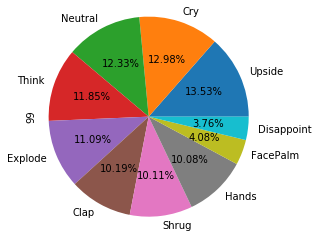

In [19]:
df[99].value_counts().plot(kind='pie',autopct='%.2f%%',radius=1.15)

Cry emoji has been used maximum number of times 12.98% of all the data and Disappoint emoji has been used the least number of times 3.76%

____________________________________________________________________________________________

In [20]:
vocab = X.sum()
print(f'Max number counts of a single words is {vocab.max()} which is present at column {vocab.idxmax()}')

Max number counts of a single words is 18711 which is present at column 75


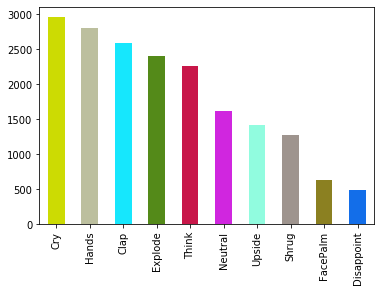

In [21]:
df[df[75]>0][99].value_counts().plot(kind='bar',color=generate_n_random_cmap(10,1)[0])

It looks like that our attribute or word number 75 is directly related to Cry and inversly related to Disppoint as the most number of times it has been used, most number of times there has been a Cry emoji

-------------------------------------------------------------------------------------------------

In [22]:
print(f'Max number counts of a single words is {vocab.min()} which is present at column {vocab.idxmin()}')

Max number counts of a single words is 38 which is present at column 70


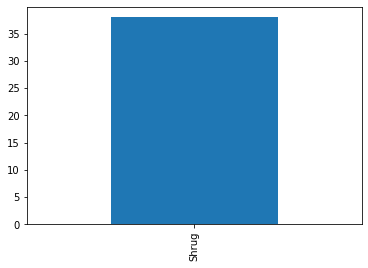

In [23]:
df[df[70]>0][99].value_counts().plot(kind='bar')

This is interesting. Whenever word at column 70 is present in the tweet, Shrug is being used

____________________________________________________________________________________________________

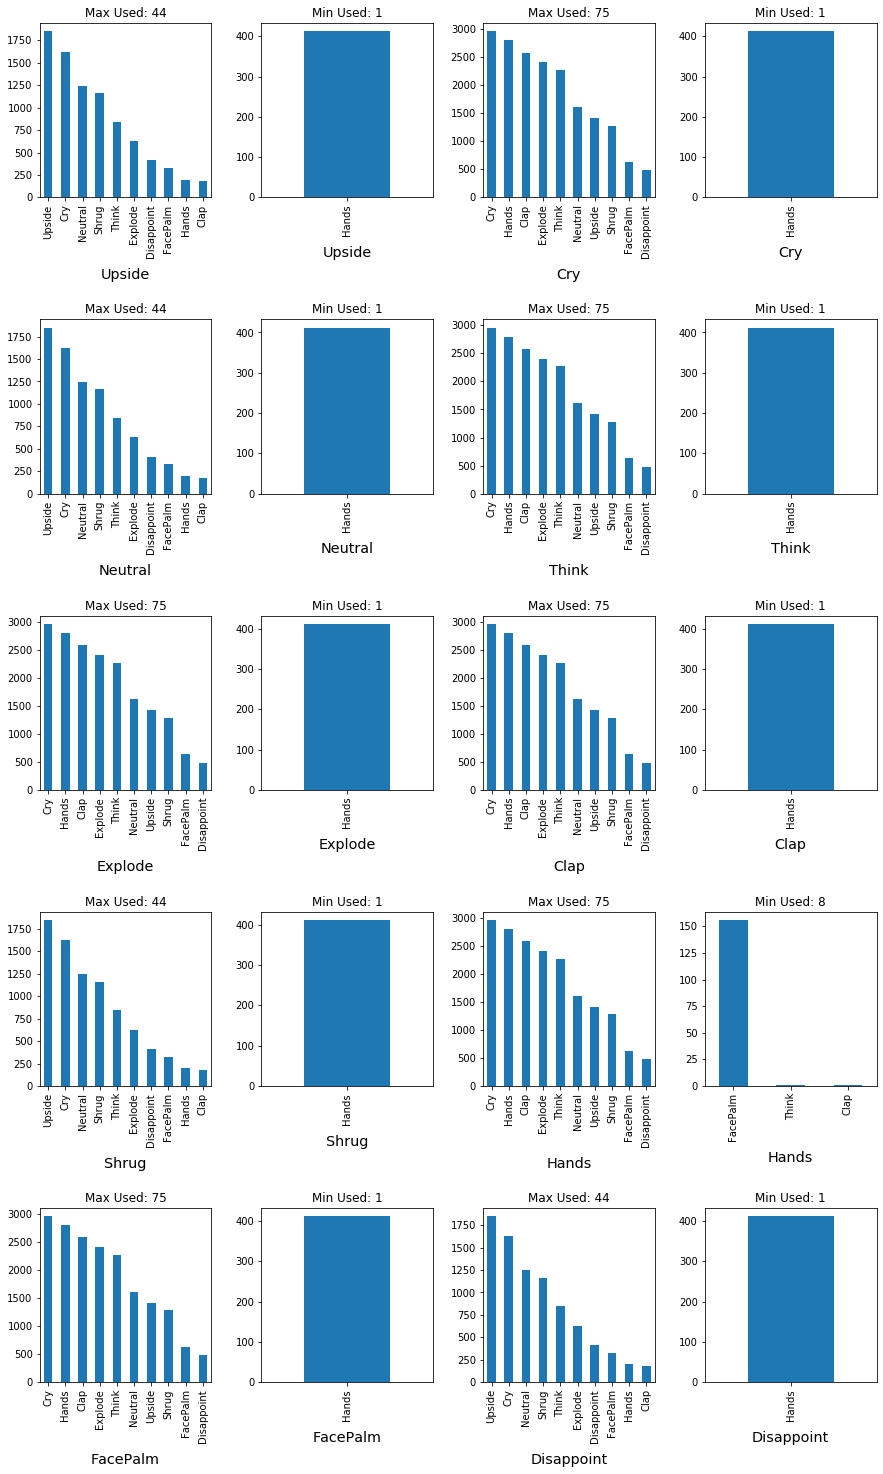

In [24]:
f,ax = plt.subplots(5,4,figsize=(15,25))
ax = ax.ravel()
i=0
for name in (df[99].value_counts().index):
    
    max_used = df[df[99]==name].drop(99,axis=1).sum().idxmax()
    min_used = df[df[99]==name].drop(99,axis=1).sum().idxmin()
    
    df[df[max_used]>0][99].value_counts().plot(kind='bar',ax=ax[i],)
    df[df[min_used]>0][99].value_counts().plot(kind='bar',ax=ax[i+1])
    
    ax[i].set_xlabel(name,labelpad=10,size='x-large')
    ax[i+1].set_xlabel(name,labelpad=10,size='x-large')
    ax[i].set_title('Max Used: '+ str(max_used))
    ax[i+1].set_title('Min Used: '+ str(min_used))
    
    i+=2

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.29, hspace=0.7)


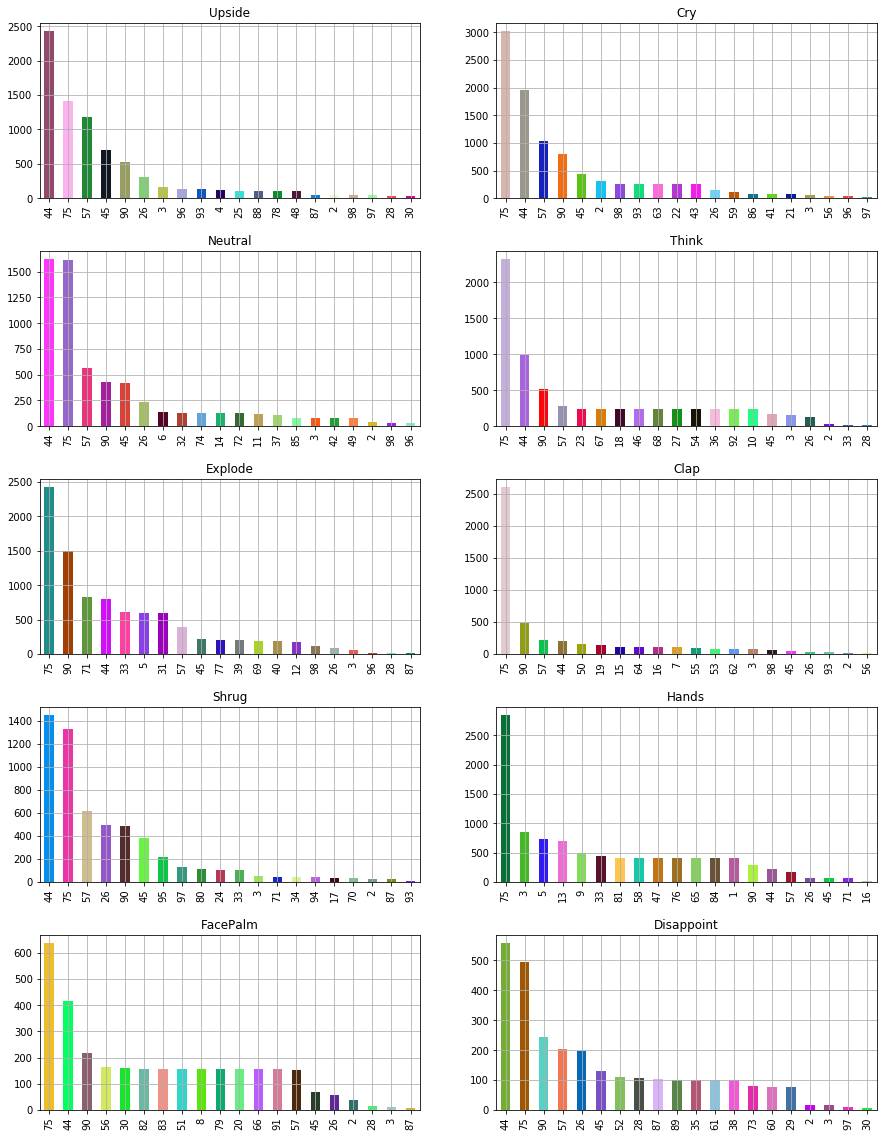

In [26]:
f,ax = plt.subplots(5,2,figsize=(15,20))
ax = ax.ravel()
color = generate_n_random_cmap()

for i,name in enumerate(df[99].value_counts().index):
    
    top_20 = df[df[99]==name].drop(99,axis=1).sum().sort_values(ascending=False).head(20)
    top_20.plot(kind='bar',ax=ax[i],color=color[i])
    
    ax[i].set_title(name)
    ax[i].grid()

#f.suptitle('Top 20 Words')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
plt.show()